In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv("loan_default_prediction_project.csv")

In [3]:
data

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0     56    Male  71266.105175          Employed  Suburban           639   
1     46     NaN  37283.054601          Employed  Suburban           474   
2     32    Male  69567.036392          Employed     Urban           750   
3     60  Female  72016.087392          Employed     Rural           435   
4     25  Female  32161.988250        Unemployed  Suburban           315   
..   ...     ...           ...               ...       ...           ...   
995   22  Female  98081.105862        Unemployed     Urban           727   
996   40    Male  30044.017181          Employed     Rural           416   
997   27  Female  21355.813191        Unemployed     Rural           806   
998   61  Female  81612.656941               NaN     Rural           845   
999   19    Male  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289  Non-Default  13068.330587   
1                0.456731           40192.994312      Default  15159.338369   
2                0.329231           25444.262759      Default   6131.287659   
3                0.052482            3122.213749  Non-Default  37531.880251   
4                0.450236           19197.350445  Non-Default  41466.397989   
..                    ...                    ...          ...           ...   
995              0.961613            3586.586891  Non-Default  41473.241896   
996              0.775082           32993.493341      Default  48942.588814   
997              0.621937           21579.216456      Default  34010.252873   
998              0.606793           38180.153354      Default  17504.010506   
999              0.849470           49629.885929  Non-Default  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
1        11.727471                    69  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
..             ...                   ...  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
998      13.263354                    27  
999      16.606985                    49  

[1000 rows x 12 columns]

In [4]:
data.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

# Conversion to Numeric

In [5]:
data['Debt_to_Income_Ratio'] = pd.to_numeric(data['Debt_to_Income_Ratio'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Credit_Score'] = pd.to_numeric(data['Credit_Score'], errors='coerce')
data['Existing_Loan_Balance'] = pd.to_numeric(data['Existing_Loan_Balance'], errors='coerce')
data['Loan_Amount'] = pd.to_numeric(data['Loan_Amount'], errors='coerce')
data['Interest_Rate'] = pd.to_numeric(data['Interest_Rate'], errors='coerce')
data['Loan_Duration_Months'] = pd.to_numeric(data['Loan_Duration_Months'], errors='coerce')

In [6]:
data

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0     56    Male  71266.105175          Employed  Suburban           639   
1     46     NaN  37283.054601          Employed  Suburban           474   
2     32    Male  69567.036392          Employed     Urban           750   
3     60  Female  72016.087392          Employed     Rural           435   
4     25  Female  32161.988250        Unemployed  Suburban           315   
..   ...     ...           ...               ...       ...           ...   
995   22  Female  98081.105862        Unemployed     Urban           727   
996   40    Male  30044.017181          Employed     Rural           416   
997   27  Female  21355.813191        Unemployed     Rural           806   
998   61  Female  81612.656941               NaN     Rural           845   
999   19    Male  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289  Non-Default  13068.330587   
1                0.456731           40192.994312      Default  15159.338369   
2                0.329231           25444.262759      Default   6131.287659   
3                0.052482            3122.213749  Non-Default  37531.880251   
4                0.450236           19197.350445  Non-Default  41466.397989   
..                    ...                    ...          ...           ...   
995              0.961613            3586.586891  Non-Default  41473.241896   
996              0.775082           32993.493341      Default  48942.588814   
997              0.621937           21579.216456      Default  34010.252873   
998              0.606793           38180.153354      Default  17504.010506   
999              0.849470           49629.885929  Non-Default  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
1        11.727471                    69  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
..             ...                   ...  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
998      13.263354                    27  
999      16.606985                    49  

[1000 rows x 12 columns]

In [7]:
data.isna().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

# Prediction of Gender NaN values

In [8]:
# Separate data into training (with non-missing A1C_Result) and prediction (with missing A1C_Result) sets
train_data = data.dropna(subset=['Gender']).copy()
prediction_data = data[data['Gender'].isna()].copy()

In [9]:
train_data

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0     56    Male  71266.105175          Employed  Suburban           639   
2     32    Male  69567.036392          Employed     Urban           750   
3     60  Female  72016.087392          Employed     Rural           435   
4     25  Female  32161.988250        Unemployed  Suburban           315   
5     38  Female  24907.970169          Employed     Urban           632   
..   ...     ...           ...               ...       ...           ...   
995   22  Female  98081.105862        Unemployed     Urban           727   
996   40    Male  30044.017181          Employed     Rural           416   
997   27  Female  21355.813191        Unemployed     Rural           806   
998   61  Female  81612.656941               NaN     Rural           845   
999   19    Male  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289  Non-Default  13068.330587   
2                0.329231           25444.262759      Default   6131.287659   
3                0.052482            3122.213749  Non-Default  37531.880251   
4                0.450236           19197.350445  Non-Default  41466.397989   
5                0.254749           22222.047884  Non-Default  40858.167955   
..                    ...                    ...          ...           ...   
995              0.961613            3586.586891  Non-Default  41473.241896   
996              0.775082           32993.493341      Default  48942.588814   
997              0.621937           21579.216456      Default  34010.252873   
998              0.606793           38180.153354      Default  17504.010506   
999              0.849470           49629.885929  Non-Default  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
5        17.295705                    28  
..             ...                   ...  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
998      13.263354                    27  
999      16.606985                    49  

[792 rows x 12 columns]

In [10]:
prediction_data

Age Gender        Income Employment_Status  Location  Credit_Score  \
1     46    NaN  37283.054601          Employed  Suburban           474   
9     28    NaN  99589.305374          Employed     Rural           633   
10    28    NaN  24622.444880        Unemployed  Suburban           632   
11    41    NaN  75602.818309               NaN     Rural           626   
14    41    NaN  31379.949495        Unemployed  Suburban           724   
..   ...    ...           ...               ...       ...           ...   
977   37    NaN  50327.523894          Employed     Rural           450   
979   37    NaN  21546.210473          Employed  Suburban           464   
980   29    NaN  29949.471920               NaN     Rural           444   
992   50    NaN  81919.310252               NaN     Rural           664   
994   27    NaN  61703.683812        Unemployed     Urban           306   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
1                0.456731           40192.994312      Default  15159.338369   
9                0.124647            4257.181828  Non-Default  45388.788007   
10               0.961415           15147.258395  Non-Default  25122.222704   
11               0.635911           37229.848798  Non-Default  24662.968749   
14               0.047058           49631.277423  Non-Default  28439.331649   
..                    ...                    ...          ...           ...   
977              0.917601           49106.759222      Default  21062.178408   
979              0.990749           46248.847412  Non-Default  16815.756715   
980              0.882823           39283.457494  Non-Default  16466.146971   
992              0.664424            6164.196373  Non-Default  39128.388836   
994              0.835540            1486.813065  Non-Default   8447.484392   

     Interest_Rate  Loan_Duration_Months  
1        11.727471                    69  
9        13.650256                    24  
10       16.518682                    44  
11       19.473640                    36  
14       10.561693                    17  
..             ...                   ...  
977      18.206895                    50  
979       6.622029                    57  
980       7.608071                    16  
992      16.244597                    66  
994      11.445092                    42  

[208 rows x 12 columns]

In [11]:
data.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Assuming train_data and prediction_data are already defined

# Extracting features and target variable
X_train = train_data.drop(['Gender'], axis=1)
X_pred = prediction_data.drop(['Gender'], axis=1)
y_train = train_data['Gender']

# One-Hot Encoding for categorical features
categorical_features = ['Employment_Status', 'Location', 'Loan_Status']
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features]).toarray()
X_pred_encoded = ohe.transform(X_pred[categorical_features]).toarray()

# Standard Scaling for numerical features
numerical_features = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio', 
                      'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_pred_scaled = scaler.transform(X_pred[numerical_features])

# Concatenating encoded categorical features with scaled numerical features
X_train = np.concatenate((X_train_scaled, X_train_encoded), axis=1)
X_pred = np.concatenate((X_pred_scaled, X_pred_encoded), axis=1)


In [13]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
# X_train = train_data.drop(['Gender'], axis=1)
# X_pred = prediction_data.drop(['Gender'], axis=1)
# y_train = train_data['Gender']

# #numeric =[]
# #Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months

# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train[['Employment_Status']])
# x1 = ohe.fit_transform(X_train[['Employment_Status']]).toarray()
# ohe2 = OneHotEncoder(handle_unknown='ignore')
# ohe2.fit(X_train[['Location']])
# x2 = ohe2.fit_transform(X_train[['Location']]).toarray()
# ohe3 = OneHotEncoder(handle_unknown='ignore')
# ohe3.fit(X_train[['Loan_Status']])
# x3 = ohe3.fit_transform(X_train[['Loan_Status']]).toarray()
# # independent features after encoding
# X_train = np.concatenate((X_train[['Age', 'Income','Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']].values, x1, x2, x3), axis=1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)



# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_pred[['Employment_Status']])
# x1 = ohe.fit_transform(X_pred[['Employment_Status']]).toarray()
# ohe2 = OneHotEncoder(handle_unknown='ignore')
# ohe2.fit(X_pred[['Location']])
# x2 = ohe2.fit_transform(X_pred[['Location']]).toarray()
# ohe3 = OneHotEncoder(handle_unknown='ignore')
# ohe3.fit(X_pred[['Loan_Status']])
# x3 = ohe3.fit_transform(X_pred[['Loan_Status']]).toarray()
# # independent features after encoding
# X_pred = np.concatenate((X_pred[['Age', 'Income','Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']].values, x1, x2, x3), axis=1)
# scaler = StandardScaler()
# X_pred = scaler.fit_transform(X_pred)


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print(X_train_train.shape)
print(X_train_test.shape)
print(y_train_train.shape)
print(y_train_test.shape)


(554, 16)
(238, 16)
(554,)
(238,)


# Check for Best fit Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Train the DecisionTreeClassifier
dt.fit(X_train_train, y_train_train)

# Evaluate the model on the training set
train_accuracy = dt.score(X_train_train, y_train_train)
print("Training accuracy:", train_accuracy)
test_accuracy = dt.score(X_train_test, y_train_test)
print("Training accuracy:", test_accuracy)



Training accuracy: 1.0
Training accuracy: 0.5588235294117647


In [16]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_train, y_train_train)

# Evaluate the model on the training set
train_accuracy = rf.score(X_train_train, y_train_train)
print("Training accuracy:", train_accuracy)
test_accuracy = rf.score(X_train_test, y_train_test)
print("Training accuracy:", test_accuracy)



Training accuracy: 1.0
Training accuracy: 0.4831932773109244


In [20]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_train, y_train_train)

# Evaluate the model on the training set
train_accuracy = svm.score(X_train_train, y_train_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = svm.score(X_train_test, y_train_test)
print("Test accuracy:", test_accuracy)


Training accuracy: 0.7635379061371841
Test accuracy: 0.5168067226890757


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn.fit(X_train_train, y_train_train)

# Evaluate the model on the training set
train_accuracy = knn.score(X_train_train, y_train_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = knn.score(X_train_test, y_train_test)
print("Test accuracy:", test_accuracy)


Training accuracy: 0.6678700361010831
Test accuracy: 0.5084033613445378


# Filling Data with Decision Tree classifier

In [25]:
# Predict missing values
predicted_values = dt.predict(X_pred)

# Fill missing values in prediction data with predicted values
prediction_data['Gender'] = predicted_values

# Concatenate training and prediction data
filled_data = pd.concat([train_data, prediction_data])


In [26]:
filled_data 

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0     56    Male  71266.105175          Employed  Suburban           639   
2     32    Male  69567.036392          Employed     Urban           750   
3     60  Female  72016.087392          Employed     Rural           435   
4     25  Female  32161.988250        Unemployed  Suburban           315   
5     38  Female  24907.970169          Employed     Urban           632   
..   ...     ...           ...               ...       ...           ...   
977   37  Female  50327.523894          Employed     Rural           450   
979   37  Female  21546.210473          Employed  Suburban           464   
980   29    Male  29949.471920               NaN     Rural           444   
992   50  Female  81919.310252               NaN     Rural           664   
994   27    Male  61703.683812        Unemployed     Urban           306   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289  Non-Default  13068.330587   
2                0.329231           25444.262759      Default   6131.287659   
3                0.052482            3122.213749  Non-Default  37531.880251   
4                0.450236           19197.350445  Non-Default  41466.397989   
5                0.254749           22222.047884  Non-Default  40858.167955   
..                    ...                    ...          ...           ...   
977              0.917601           49106.759222      Default  21062.178408   
979              0.990749           46248.847412  Non-Default  16815.756715   
980              0.882823           39283.457494  Non-Default  16466.146971   
992              0.664424            6164.196373  Non-Default  39128.388836   
994              0.835540            1486.813065  Non-Default   8447.484392   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
5        17.295705                    28  
..             ...                   ...  
977      18.206895                    50  
979       6.622029                    57  
980       7.608071                    16  
992      16.244597                    66  
994      11.445092                    42  

[1000 rows x 12 columns]

In [27]:
df = filled_data .copy()

# E.D.A

In [28]:
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Gender, Income, Employment_Status, Location, Credit_Score, Debt_to_Income_Ratio, Existing_Loan_Balance, Loan_Status, Loan_Amount, Interest_Rate, Loan_Duration_Months]
Index: []

In [30]:
df.isna().sum()

Age                       0
Gender                    0
Income                    0
Employment_Status        94
Location                  0
Credit_Score              0
Debt_to_Income_Ratio      0
Existing_Loan_Balance     0
Loan_Status               0
Loan_Amount               0
Interest_Rate             0
Loan_Duration_Months      0
dtype: int64

In [31]:
df['Employment_Status'].fillna(df['Employment_Status'].mode()[0], inplace=True)

In [32]:
df.describe()

Age         Income  Credit_Score  Debt_to_Income_Ratio  \
count  1000.000000    1000.000000   1000.000000           1000.000000   
mean     40.986000   60705.291386    571.094000              0.485502   
std      13.497852   24594.030383    163.395983              0.296466   
min      18.000000   20010.775440    250.000000              0.000628   
25%      29.000000   40820.367273    429.000000              0.220606   
50%      42.000000   60547.119929    567.000000              0.483633   
75%      52.000000   80338.552791    720.250000              0.735476   
max      64.000000  150000.000000    849.000000              0.999849   

       Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
count            1000.000000   1000.000000    1000.000000   
mean            25239.656186  27636.369345      11.538267   
std             14202.689890  12925.200961       4.883342   
min                80.059377   5060.998602       3.003148   
25%             13597.494593  16756.405848       7.483547   
50%             25439.429898  27938.066858      11.537942   
75%             37305.466739  39151.564233      15.499129   
max             49987.578171  49986.843702      19.991438   

       Loan_Duration_Months  
count           1000.000000  
mean              42.221000  
std               17.116867  
min               12.000000  
25%               27.000000  
50%               42.000000  
75%               57.000000  
max               71.000000

# Checking & Treating for Outliers

In [36]:
from sklearn.ensemble import IsolationForest
def treat_outliers_isolation_forest(dataframe,column):
    clf = IsolationForest(contamination=0.1)  # Contamination is the expected percentage of outliers
    clf.fit(dataframe[[column]])
    outliers = clf.predict(dataframe[[column]])
    dataframe.loc[outliers == -1,column]=None

In [37]:
treat_outliers_isolation_forest(df,"Income")

In [38]:
df = df.dropna()

# Data Visulaization

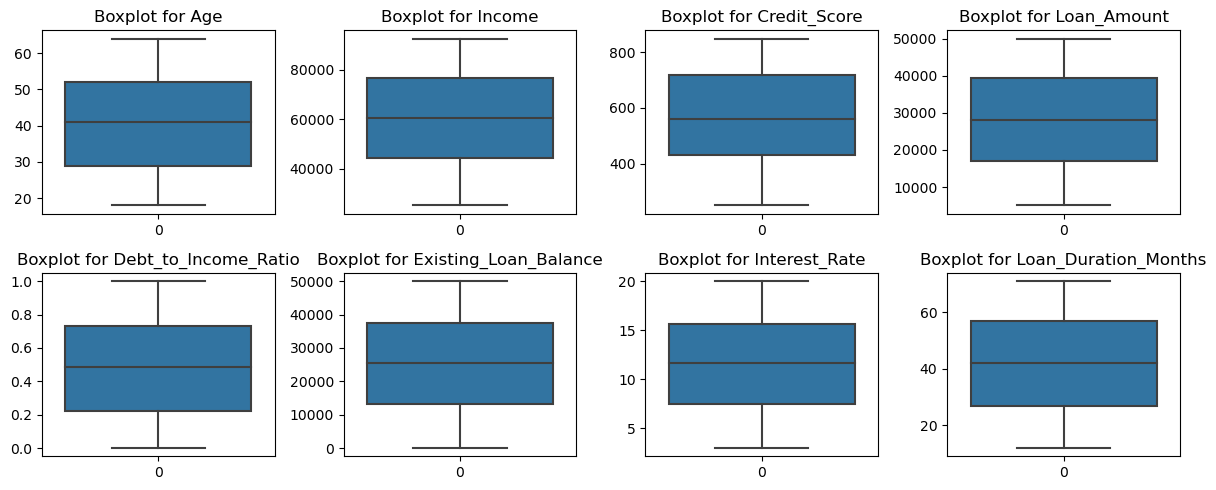

In [39]:
#import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))

# Plot for col1
sns.boxplot(df['Age'], ax=axes[0,0])
axes[0,0].set_title('Boxplot for Age')

# Plot for col2
sns.boxplot(df['Income'], ax=axes[0,1])
axes[0,1].set_title('Boxplot for Income')

# Plot for col3
sns.boxplot(df['Credit_Score'], ax=axes[0,2])
axes[0,2].set_title('Boxplot for Credit_Score')

sns.boxplot(df['Loan_Amount'], ax=axes[0,3])
axes[0,3].set_title('Boxplot for Loan_Amount')


# Plot for col4
sns.boxplot(df['Debt_to_Income_Ratio'], ax=axes[1,0])
axes[1,0].set_title('Boxplot for Debt_to_Income_Ratio')

sns.boxplot(df['Existing_Loan_Balance'], ax=axes[1,1])
axes[1,1].set_title('Boxplot for Existing_Loan_Balance')

sns.boxplot(df['Interest_Rate'], ax=axes[1,2])
axes[1,2].set_title('Boxplot for Interest_Rate')

sns.boxplot(df['Loan_Duration_Months'], ax=axes[1,3])
axes[1,3].set_title('Boxplot for Loan_Duration_Months')


# Adjust layout
plt.tight_layout()

# Show plots
plt.show()






In [40]:
original_skewness = df[['Age', 'Income','Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']].skew()
print(original_skewness)

Age                     -0.030047
Income                  -0.098643
Credit_Score             0.068196
Debt_to_Income_Ratio     0.061116
Existing_Loan_Balance   -0.055361
Loan_Amount             -0.034076
Interest_Rate           -0.062152
Loan_Duration_Months    -0.024165
dtype: float64


In [41]:
#relation between average loan amount and loan status
df[['Loan_Amount','Loan_Status']].groupby(by='Loan_Status').mean()

#Loan defaulters tend to apply for larger loans.

Loan_Amount
Loan_Status              
Default      27158.487065
Non-Default  28088.316625

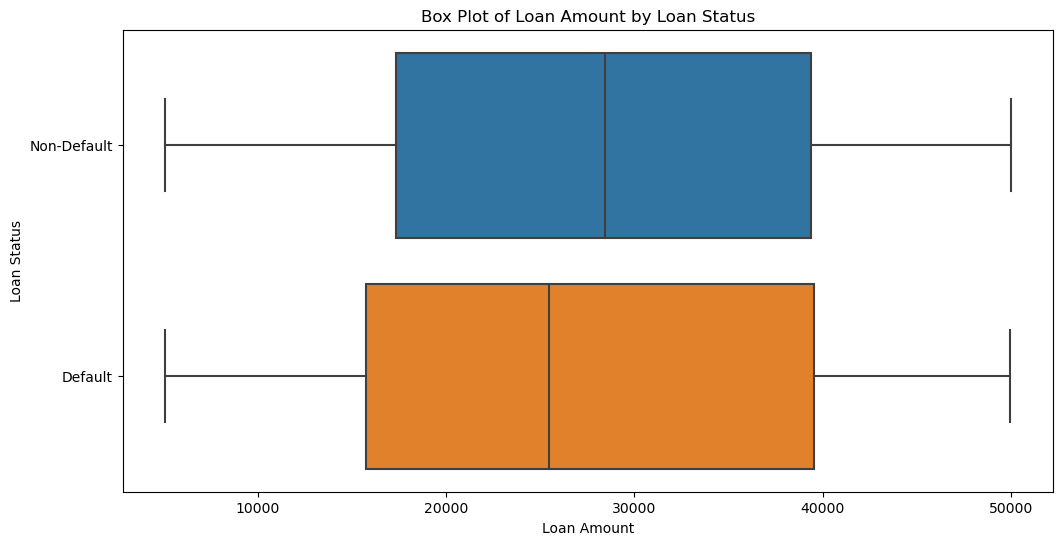

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Loan_Status'], x=df['Loan_Amount'])
plt.title('Box Plot of Loan Amount by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.show()


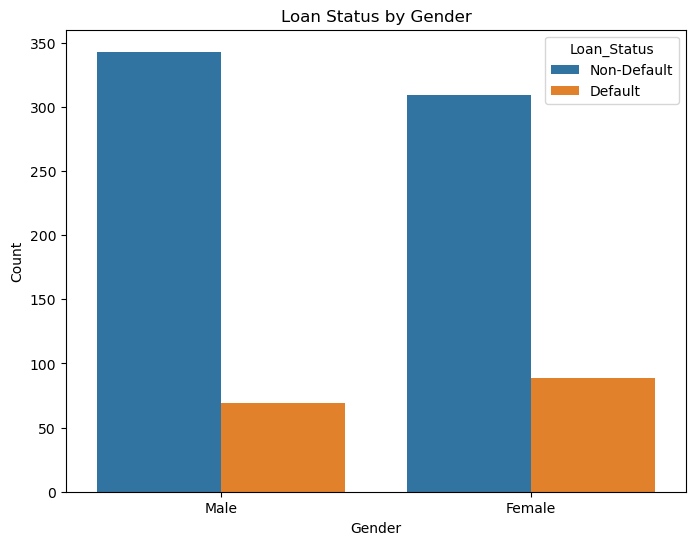

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

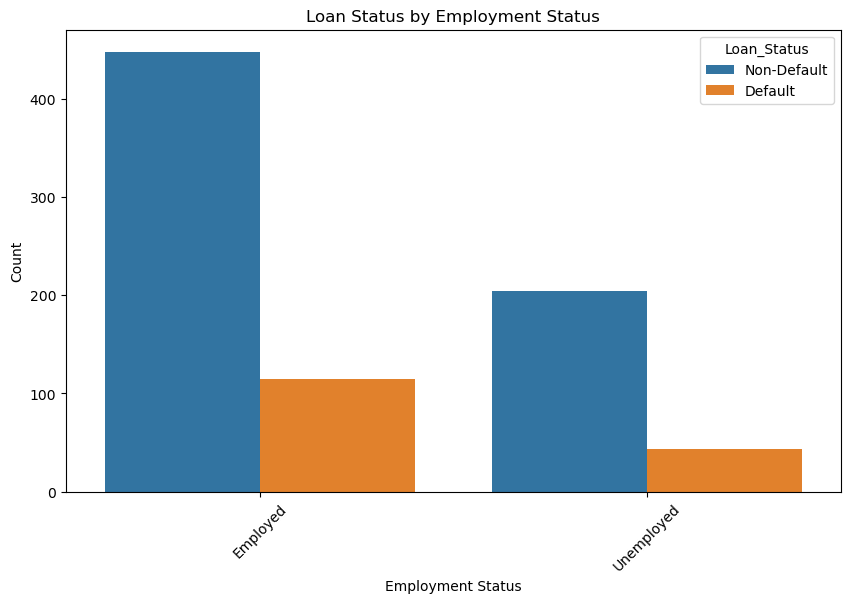

In [44]:
# Bar Plot for Employment Status vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment_Status', hue='Loan_Status', data=df)
plt.title('Loan Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
#relation between average loan amount and loan status
df[['Loan_Amount','Loan_Status']].groupby(by='Loan_Status').mean()

#Loan defaulters tend to apply for larger loans.

Loan_Amount
Loan_Status              
Default      27158.487065
Non-Default  28088.316625

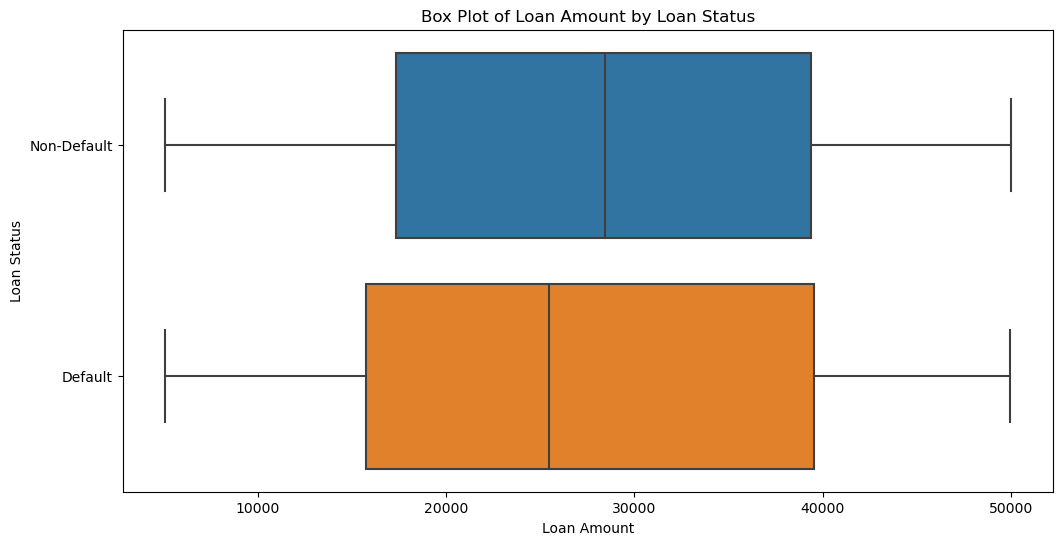

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Loan_Status'], x=df['Loan_Amount'])
plt.title('Box Plot of Loan Amount by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.show()

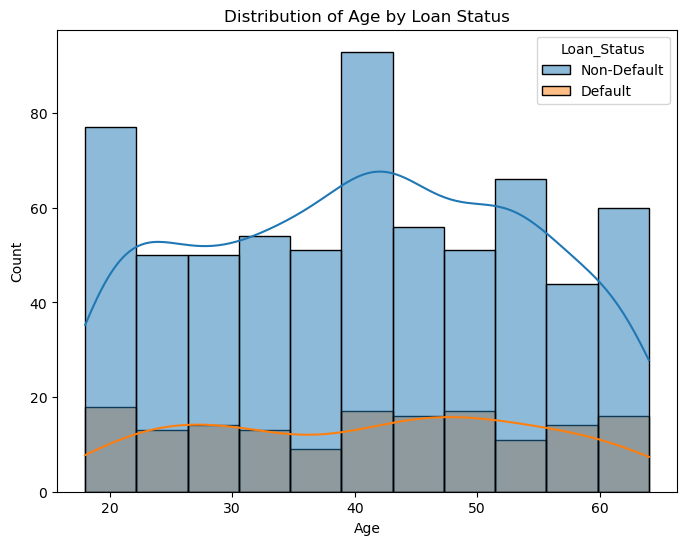

In [47]:
# Histogram for Age by Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Loan_Status', kde=True)
plt.title('Distribution of Age by Loan Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

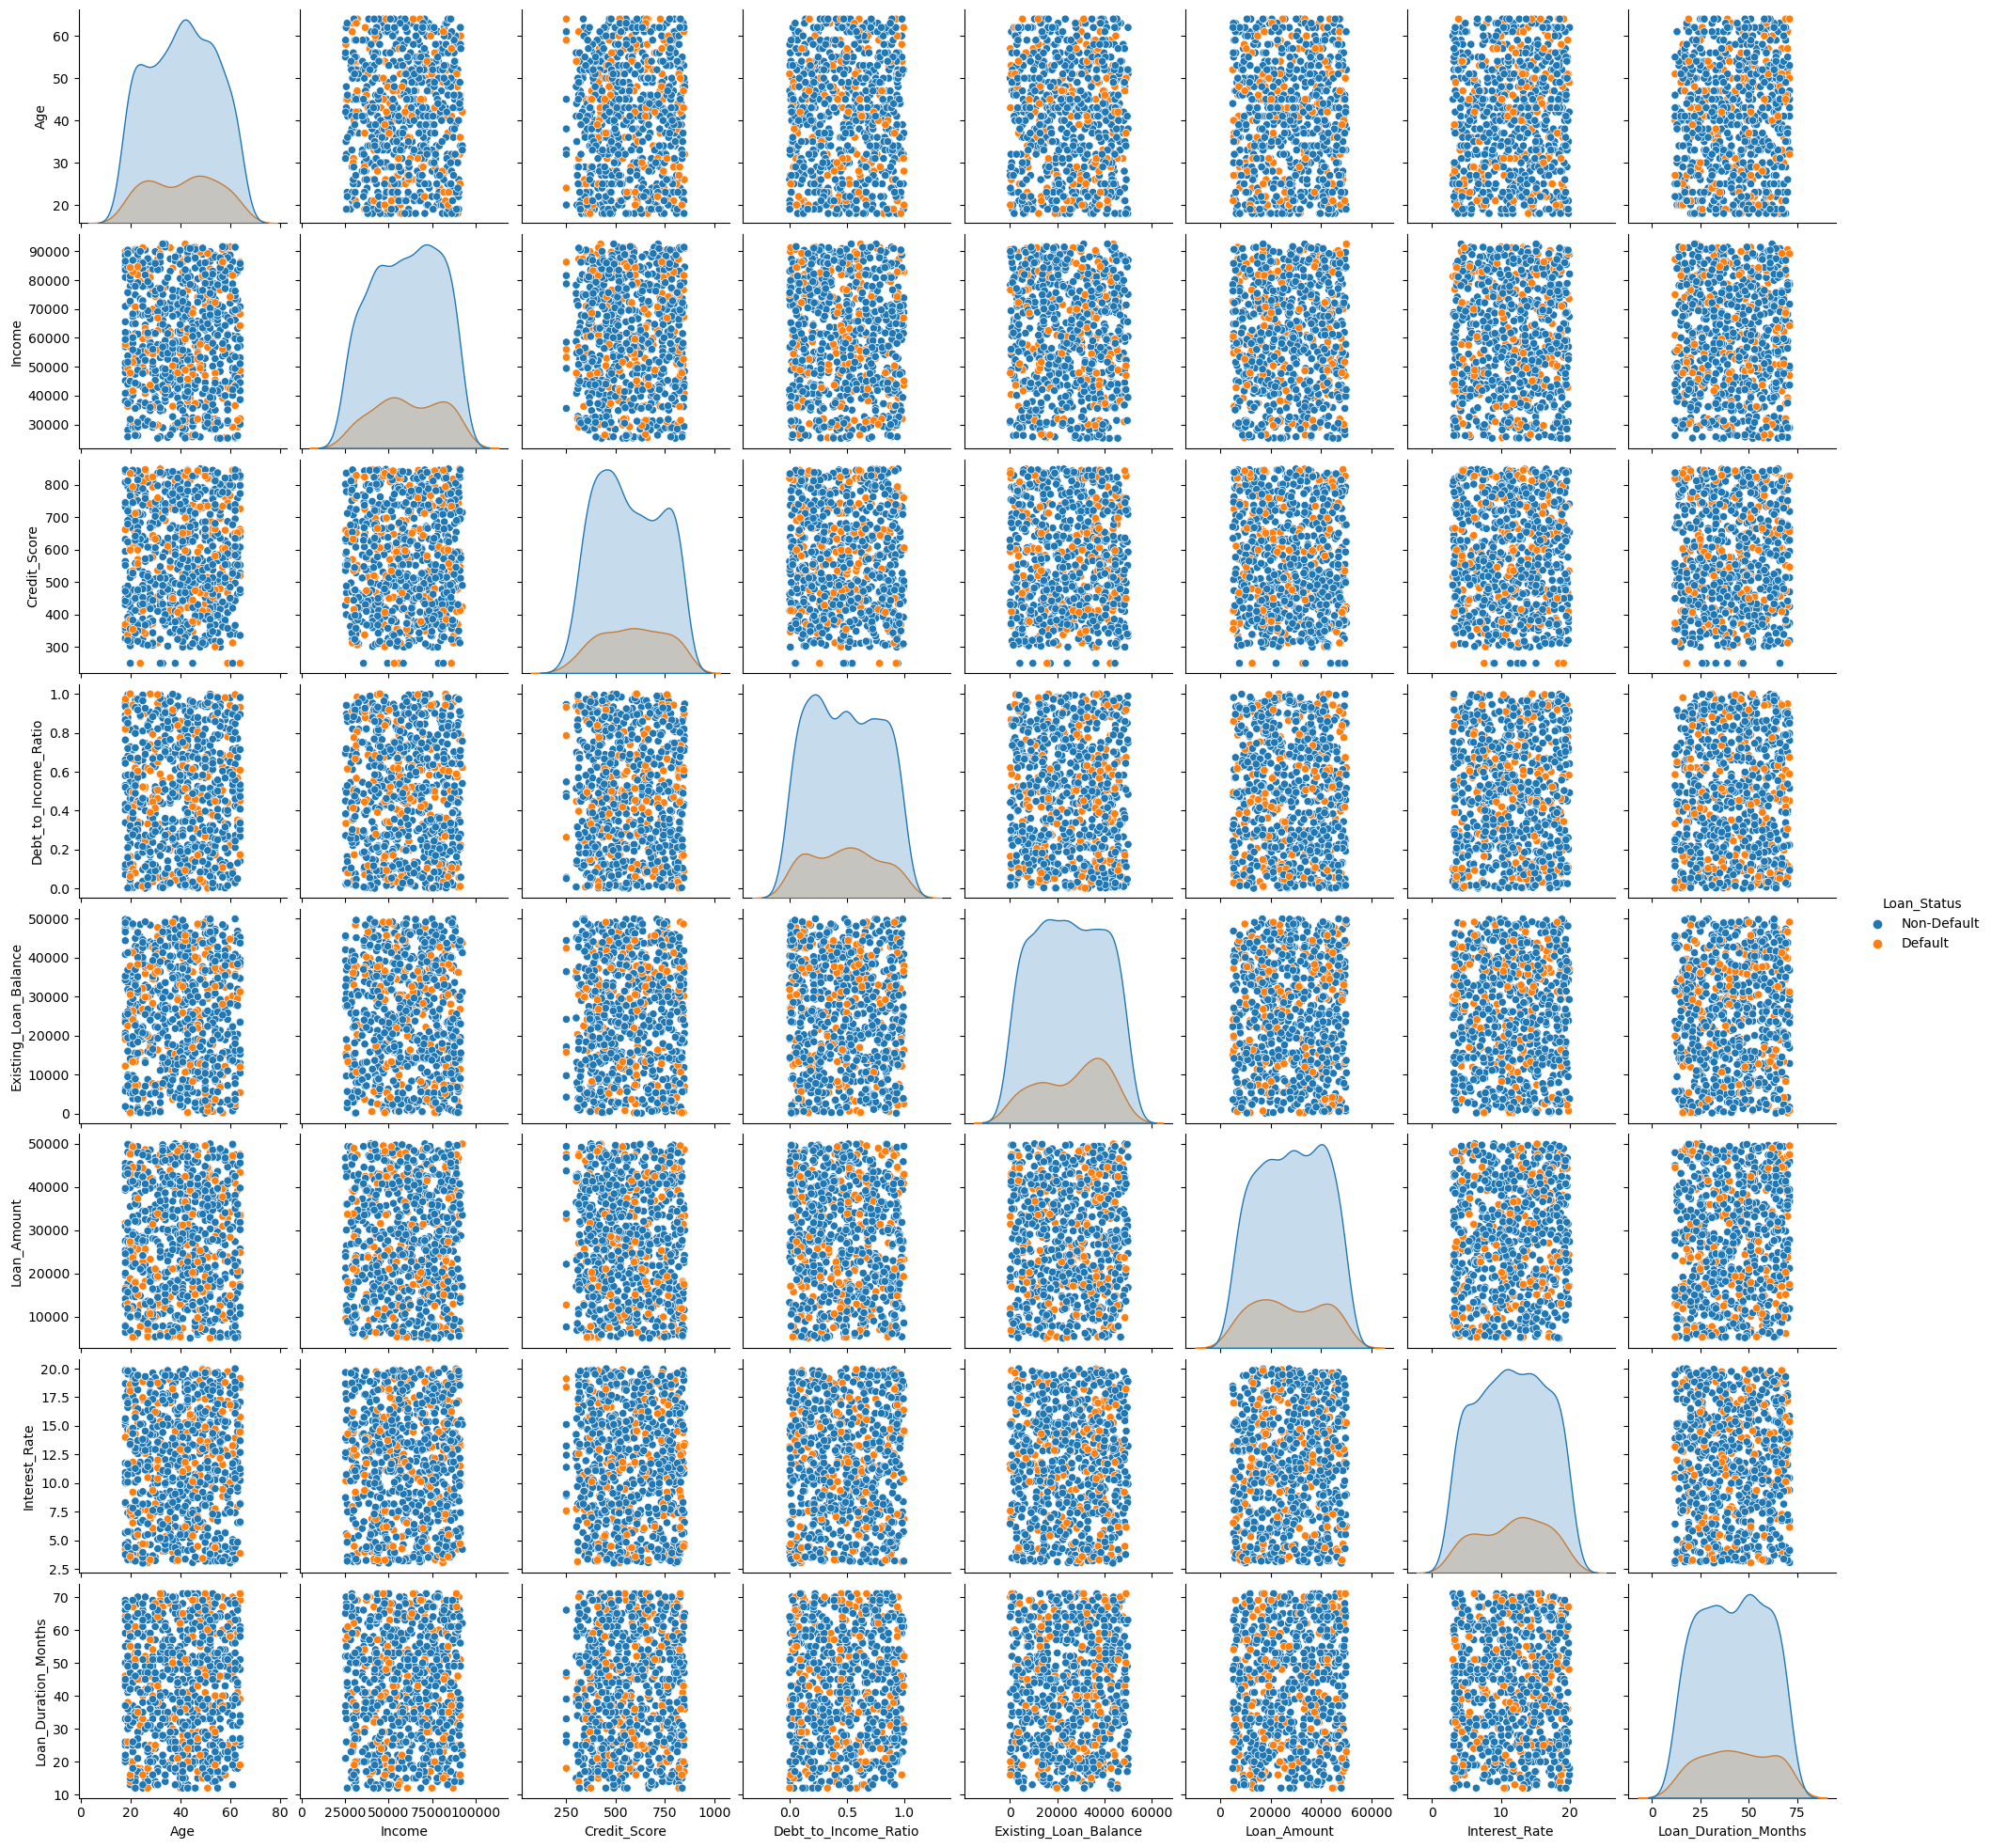

In [48]:
# Scatter Plot Matrix for Numerical Features
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.show()

# Model Building And Evaluation

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
X1 = df.drop('Loan_Status', axis=1)
Y1 = df['Loan_Status']

#Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X1[['Gender']])
x1 = ohe.fit_transform(X1[['Gender']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X1[['Employment_Status']])
x2 = ohe2.fit_transform(X1[['Employment_Status']]).toarray()
ohe3 = OneHotEncoder(handle_unknown='ignore')
ohe3.fit(X1[['Location']])
x3 = ohe3.fit_transform(X1[['Location']]).toarray()
LB = LabelBinarizer()
LB.fit(Y1) 
y1 = LB.fit_transform(Y1)
# independent features after encoding
X1 = np.concatenate((X1[['Age','Income','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Amount','Interest_Rate','Loan_Duration_Months']].values, x1, x2, x3), axis=1)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)


In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X1,y1)

In [51]:
X.shape

(1304, 15)

In [52]:
y.shape

(1304,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(978, 15)
(326, 15)
(978,)
(326,)


In [54]:
df['Loan_Status'].value_counts()

Loan_Status
Non-Default    652
Default        158
Name: count, dtype: int64

# LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = lr.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing set
test_accuracy = lr.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)


Training accuracy: 0.5899795501022495
Testing accuracy: 0.549079754601227


# RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state =42)
rf.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = rf.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing set
test_accuracy = rf.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.8680981595092024


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [58]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8558282208588958


In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[132,  21],
       [ 26, 147]], dtype=int64)

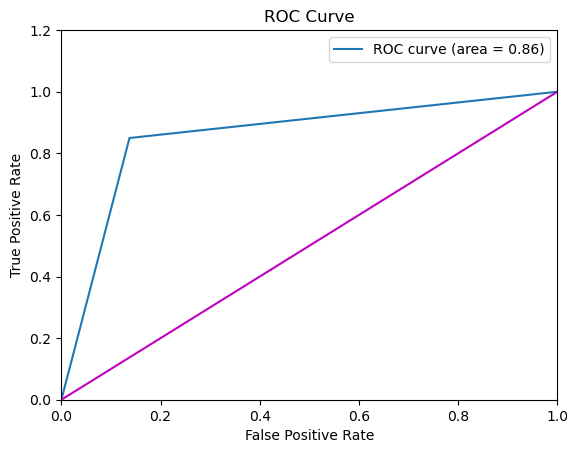

In [60]:
# ROC curve and AUC
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       153
           1       0.88      0.85      0.86       173

    accuracy                           0.86       326
   macro avg       0.86      0.86      0.86       326
weighted avg       0.86      0.86      0.86       326



# DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Train the DecisionTreeClassifier
dt.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = dt.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing set
test_accuracy = dt.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.7024539877300614


# GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier
gb.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = gb.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing set
test_accuracy = gb.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)


Training accuracy: 0.9284253578732107
Testing accuracy: 0.7177914110429447


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [66]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred1 contains the predicted labels
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.8466257668711656


In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred1)
cm

array([[132,  21],
       [ 29, 144]], dtype=int64)

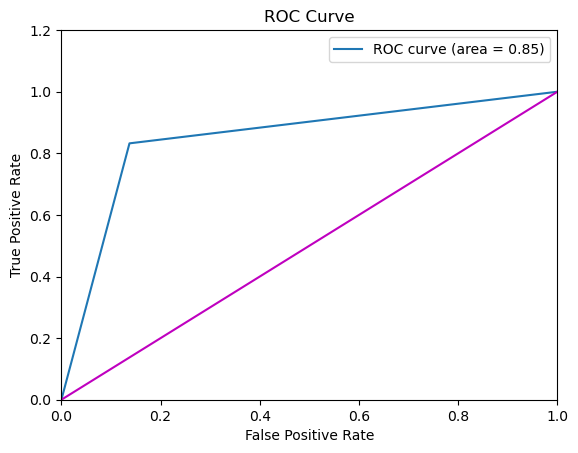

In [68]:
# ROC curve and AUC
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       153
           1       0.87      0.83      0.85       173

    accuracy                           0.85       326
   macro avg       0.85      0.85      0.85       326
weighted avg       0.85      0.85      0.85       326



In [70]:
df['Age'].min()

18

In [71]:
df['Age'].max()

64

In [72]:
df['Income'].min()

25188.28755863747

In [73]:
df['Income'].max()

92500.36644168294

In [74]:
df['Credit_Score'].min()

250

In [75]:
df['Credit_Score'].max()

849

In [76]:
df['Existing_Loan_Balance'].min()

80.05937745144132

In [77]:
df['Existing_Loan_Balance'].max()

49987.578171452216

In [78]:
df['Loan_Amount'].min()

5060.998602407698

In [79]:
df['Loan_Amount'].max()

49986.8437019824

In [80]:
df['Interest_Rate'].min()

3.003148320022528

In [81]:
df['Interest_Rate'].max()

19.99143795711827

In [82]:
df['Loan_Duration_Months'].min()

12

In [83]:
df['Loan_Duration_Months'].max()

71

In [84]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
df['Employment_Status'].unique()

array(['Employed', 'Unemployed'], dtype=object)

In [86]:
df['Location'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(["Non-Default", "Default"])

# Define the decode_labels function
def decode_labels(encoded_data, label_encoder):
    decoded_data = label_encoder.inverse_transform(encoded_data)
    return decoded_data


# NEW INPUT AND MAKING PREDICTIONS
new_sample = np.array([[55, 15000, 250, 0.62, 23999, 57466, 12.13, 66, 'Male', 'Employed', 'Urban']])

# One-hot encoding categorical features
new_sample_gender = ohe.transform(new_sample[:, [8]]).toarray()
new_sample_employeeStatus = ohe2.transform(new_sample[:, [9]]).toarray()
new_sample_Location = ohe3.transform(new_sample[:, [10]]).toarray()

# Concatenating one-hot encoded features with numerical features
new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_gender, new_sample_employeeStatus, new_sample_Location), axis=1)

# Scaling numerical features
new_sample_scaled = scaler.transform(new_sample)

# Predicting loan default for the new sample
new_pred = rf.predict(new_sample_scaled)

# Decode the predicted labels
decoded_pred = decode_labels(new_pred, label_encoder)

print('Loan_Default_prediction is:', decoded_pred)


Loan_Default_prediction is: ['Non-Default']


In [89]:
import pickle
with open('model_gb.pkl','wb') as file:
    pickle.dump(gb,file)
with open('scaler_gb.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)
with open('ohe2.pkl','wb') as file:
    pickle.dump(ohe2,file)
with open('ohe3.pkl','wb') as file:
    pickle.dump(ohe3,file)
